In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

#importing packages

In [2]:
f = h5py.File('data/assorted_images/satellite_images.h5', 'r')
f.keys()

#plopping file with all of our pics into program

<KeysViewHDF5 ['data', 'labels']>

In [3]:
inds = np.arange(np.array(f['data']).shape[0])
np.random.shuffle(inds)
dset = np.array(f['data'])[inds]
lset = np.array(f['labels'])[inds]
#dset = np.random.shuffle(np.array(f['data']))
#lset = np.array(f['labels'])

print(dset)
print(lset)
print(dset.shape)
print(lset.shape)

#taking out the data and labels of our pics and assigining them variables

[[[[ 86  86  74]
   [ 86  86  74]
   [ 85  85  73]
   ...
   [113  97  81]
   [113  98  79]
   [110  95  76]]

  [[ 86  86  74]
   [ 85  85  73]
   [ 85  85  73]
   ...
   [113  97  81]
   [113  98  79]
   [110  95  76]]

  [[ 85  85  73]
   [ 84  84  72]
   [ 84  84  72]
   ...
   [112  96  80]
   [112  97  78]
   [109  94  75]]

  ...

  [[ 88  89  75]
   [ 85  86  72]
   [ 81  82  68]
   ...
   [ 64  75  67]
   [ 63  74  66]
   [ 65  76  68]]

  [[ 87  88  74]
   [ 89  90  76]
   [ 87  88  74]
   ...
   [ 63  74  66]
   [ 62  73  65]
   [ 65  76  68]]

  [[ 86  87  73]
   [ 92  93  79]
   [ 93  94  80]
   ...
   [ 64  75  67]
   [ 63  74  66]
   [ 67  78  70]]]


 [[[161 132 116]
   [178 151 134]
   [181 153 141]
   ...
   [133 134 129]
   [157 158 153]
   [182 183 178]]

  [[160 131 117]
   [180 152 138]
   [177 151 138]
   ...
   [141 142 137]
   [176 177 172]
   [189 190 185]]

  [[171 143 131]
   [190 162 150]
   [180 154 141]
   ...
   [137 138 133]
   [184 185 180]
   [186 187

In [4]:

train_ratio, val_ratio = 0.9, 0.05

X_train = dset[:int(dset.shape[0]*train_ratio), ...] # ... means all the other axes
y_train = lset[:int(dset.shape[0]*train_ratio), ...]

X_val = dset[int(dset.shape[0]*train_ratio):int(dset.shape[0]*(train_ratio+val_ratio)), ...]
y_val = lset[int(dset.shape[0]*train_ratio):int(dset.shape[0]*(train_ratio+val_ratio)), ...]

X_test = dset[int(dset.shape[0]*(train_ratio+val_ratio)):, ...]
y_test = lset[int(dset.shape[0]*(train_ratio+val_ratio)):, ...]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

#splitting our data and labels into 3 sets: training, validation, and test

(576, 224, 224, 3)
(32, 224, 224, 3)
(33, 224, 224, 3)


In [5]:
import keras
from keras.models import Sequential # Sequential is one of the main models in Keras, which is basically a sequentially stacked series of layers
from keras.callbacks import EarlyStopping


#importing keras

Using TensorFlow backend.


W0709 20:42:31.128254 140737189909440 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 20:42:31.169530 140737189909440 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 20:42:31.170727 140737189909440 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 20:42:31.174057 140737189909440 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 20:42:31.193690 140737189909440 deprecation_wrappe

1e-06 4 32 3


W0709 20:42:31.531795 140737189909440 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 576 samples, validate on 32 samples
Epoch 1/20
576/576 [==============================] - 7s 13ms/step - loss: 0.8160 - acc: 0.7830 - val_loss: 1.2217 - val_acc: 0.7188
Epoch 2/20
576/576 [==============================] - 6s 10ms/step - loss: 0.8072 - acc: 0.7830 - val_loss: 1.2082 - val_acc: 0.7188
Epoch 3/20
576/576 [==============================] - 6s 10ms/step - loss: 0.7992 - acc: 0.7830 - val_loss: 1.1944 - val_acc: 0.7188
Epoch 4/20
576/576 [==============================] - 6s 10ms/step - loss: 0.7914 - acc: 0.7830 - val_loss: 1.1806 - val_acc: 0.7188
Epoch 5/20
576/576 [==============================] - 6s 10ms/step - loss: 0.7834 - acc: 0.7830 - val_loss: 1.1679 - val_acc: 0.7188
Epoch 6/20
576/576 [==============================] - 6s 10ms/step - loss: 0.7763 - acc: 0.7795 - val_loss: 1.1548 - val_acc: 0.7188
Epoch 7/20
576/576 [==============================] - 7s 12ms/step - loss: 0.7690 - acc: 0.7812 - val_loss: 1.1427 - val_acc: 0.7188
Epoch 8/20
576/576 [====

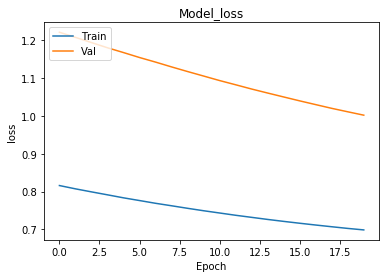

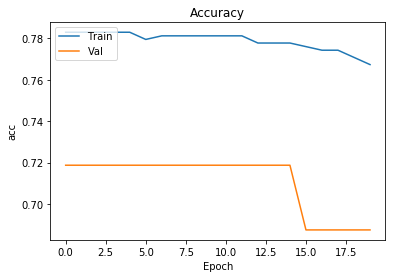

In [6]:
early_stopping = EarlyStopping(patience=50)
#model = create_model()

#learning rate = [10**-3, 3*10**-3, 10**-2,3*10**-2,0.1,0.3,1,3,10]
#learning_rate = [10**-3, 3*10**-3, 10**-2,3*10**-2]
learning_rate = [10**-6]
#layers = [2,3,4,5]
#CNN_layers = [2,3]
layers = [4]
CNN_layers = [3]
neurons = [32]
#neurons = [8,16,32,64]
# First we'll use fully-connected neural nets
#from keras.layers import Dense # Dense is Keras's name for fully connected layers


for rate in learning_rate:
    for num in layers:
        for n in neurons:
            for c in CNN_layers:
                print(rate,num,n,c)
                model = Sequential() # Re-initialize the model
                for i in range(c):
                    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, strides=(2, 2), padding='valid'))
                    model.add(keras.layers.Activation('relu'))
                    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # By default the stride is the same as the pooling size

                model.add(keras.layers.Flatten())

                for i in range(num-1):
                    model.add(keras.layers.Dense(n))
                    model.add(keras.layers.Activation('relu'))

                model.add(keras.layers.Dense(1))
                model.add(keras.layers.Activation('sigmoid'))

# Compilation

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(lr=0.0000001),metrics = ['accuracy']) #, 'f1'

# Training

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), shuffle = True, callbacks=[early_stopping])
           #print('\n',history.history.keys())

# Evaluation
acc = model.evaluate(X_test, y_test)
print('The test accuracy is: {}'.format(acc))

# And make predictions
prob = model.predict(X_test) # These are probabilities, and we want to convert them to class labels
#print(prob)
label = np.array(prob > 0.5, dtype=int)

#evaluate_acc(model)
print('The predicted probabilities are: {}'.format(prob))
print('The predicted class labels are: {}'.format(label))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()